#Meteostat

In [1]:
!pip install meteostat -q

<img src= "https://www.meteo60.fr/satellites/animation-satellite-ir-france.gif" width="900">

In [ ]:
#https://dev.meteostat.net/api/stations/meta.html#response

In [ ]:
 # cities coordintes
 #https://www.latlong.net/category/cities-109-15-2.html

https://www.latlong.net/category/cities-109-15-2.html

In [2]:
#cities = {'city_name':[Latitude,Longitude]}
cities = {'Seoul':[37.532600,127.024612]}
cities.values()

list(cities.values())[0][0] #Latitude

37.5326

In [3]:
list(cities.keys())[0]

'Seoul'

In [4]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2020, 1, 1)
end = datetime(2023, 5, 17) # fa una settimana di forecasting

cities = {'Seoul':[37.532600,127.024612]}


# Create Point for Vancouver, BC
city = Point(list(cities.values())[0][0],list(cities.values())[0][1], 20)

# Get daily data for 2018
data = Daily(city, start, end)
data = data.fetch()
data['city'] = list(cities.keys())[0]

data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,city
time,,,,,,,,,,,
2020-01-01,-0.6,-6.1,1.0,NaN,NaN,NaN,5.2,NaN,NaN,NaN,Seoul
2020-01-02,1.8,-0.4,4.7,0.0,NaN,0.0,0.0,NaN,1029.5,NaN,Seoul
2020-01-03,0.3,-3.0,6.0,0.0,NaN,341.0,3.2,NaN,NaN,NaN,Seoul
2020-01-04,0.8,-5.1,6.5,NaN,NaN,352.0,0.9,NaN,1025.8,NaN,Seoul
2020-01-05,0.4,-5.7,6.4,NaN,NaN,359.0,0.5,NaN,1030.2,NaN,Seoul
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-13,15.7,9.5,21.5,0.0,NaN,235.0,8.3,NaN,1013.3,NaN,Seoul
2023-05-14,15.7,10.2,21.3,0.0,NaN,254.0,8.9,NaN,1009.7,NaN,Seoul
2023-05-15,18.0,9.2,26.4,0.0,NaN,185.0,10.2,NaN,1008.4,NaN,Seoul


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1233 entries, 2020-01-01 to 2023-05-17
Freq: D
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    1233 non-null   float64
 1   tmin    1228 non-null   float64
 2   tmax    1226 non-null   float64
 3   prcp    1022 non-null   float64
 4   snow    6 non-null      float64
 5   wdir    1224 non-null   float64
 6   wspd    1225 non-null   float64
 7   wpgt    0 non-null      float64
 8   pres    1204 non-null   float64
 9   tsun    0 non-null      float64
 10  city    1233 non-null   object 
dtypes: float64(10), object(1)
memory usage: 115.6+ KB


In [5]:
#Iteration Pandas

for city in cities.items():
    print(city)

('Seoul', [37.5326, 127.024612])


In [6]:
for key, value in cities.items():
    print(key, '->', value)
    print(value[0])

Seoul -> [37.5326, 127.024612]
37.5326


## Multiples

In [7]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily
import pandas as pd

# Set time period
start = datetime(2020, 1, 1)
end = datetime(2023, 2, 9)

cities = {'Seoul':[37.532600,127.024612]}

###############################################################

data = pd.DataFrame()

for key, value in cities.items():
    print(key, '->', value)
    city = Point(value[0],#lat 
             value[1],#long
             20 # m height
             )
    # Get daily data for 2018
    data1 =Daily(city, start, end)
    data1 = data1.fetch()
    data1['city'] = key
    data=data.append(data1,ignore_index=False)
    

data.to_csv('test.csv')
print('Done!')
data

Seoul -> [37.5326, 127.024612]
Done!


,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,city
time,,,,,,,,,,,
2020-01-01,-0.6,-6.1,1.0,NaN,NaN,NaN,5.2,NaN,NaN,NaN,Seoul
2020-01-02,1.8,-0.4,4.7,0.0,NaN,0.0,0.0,NaN,1029.5,NaN,Seoul
2020-01-03,0.3,-3.0,6.0,0.0,NaN,341.0,3.2,NaN,NaN,NaN,Seoul
2020-01-04,0.8,-5.1,6.5,NaN,NaN,352.0,0.9,NaN,1025.8,NaN,Seoul
2020-01-05,0.4,-5.7,6.4,NaN,NaN,359.0,0.5,NaN,1030.2,NaN,Seoul
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-05,-0.8,-6.6,6.2,0.0,NaN,207.0,10.0,NaN,1025.5,NaN,Seoul
2023-02-06,0.4,-4.8,7.5,0.0,NaN,64.0,8.0,NaN,1023.2,NaN,Seoul
2023-02-07,0.8,-3.5,7.7,0.0,NaN,326.0,9.6,NaN,1021.9,NaN,Seoul


In [8]:
data.groupby('city').count()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
city,,,,,,,,,,
Seoul,1136,1131,1129,925,4,1127,1128,0,1107,0


In [14]:
df = data[data['city']=='Seoul']

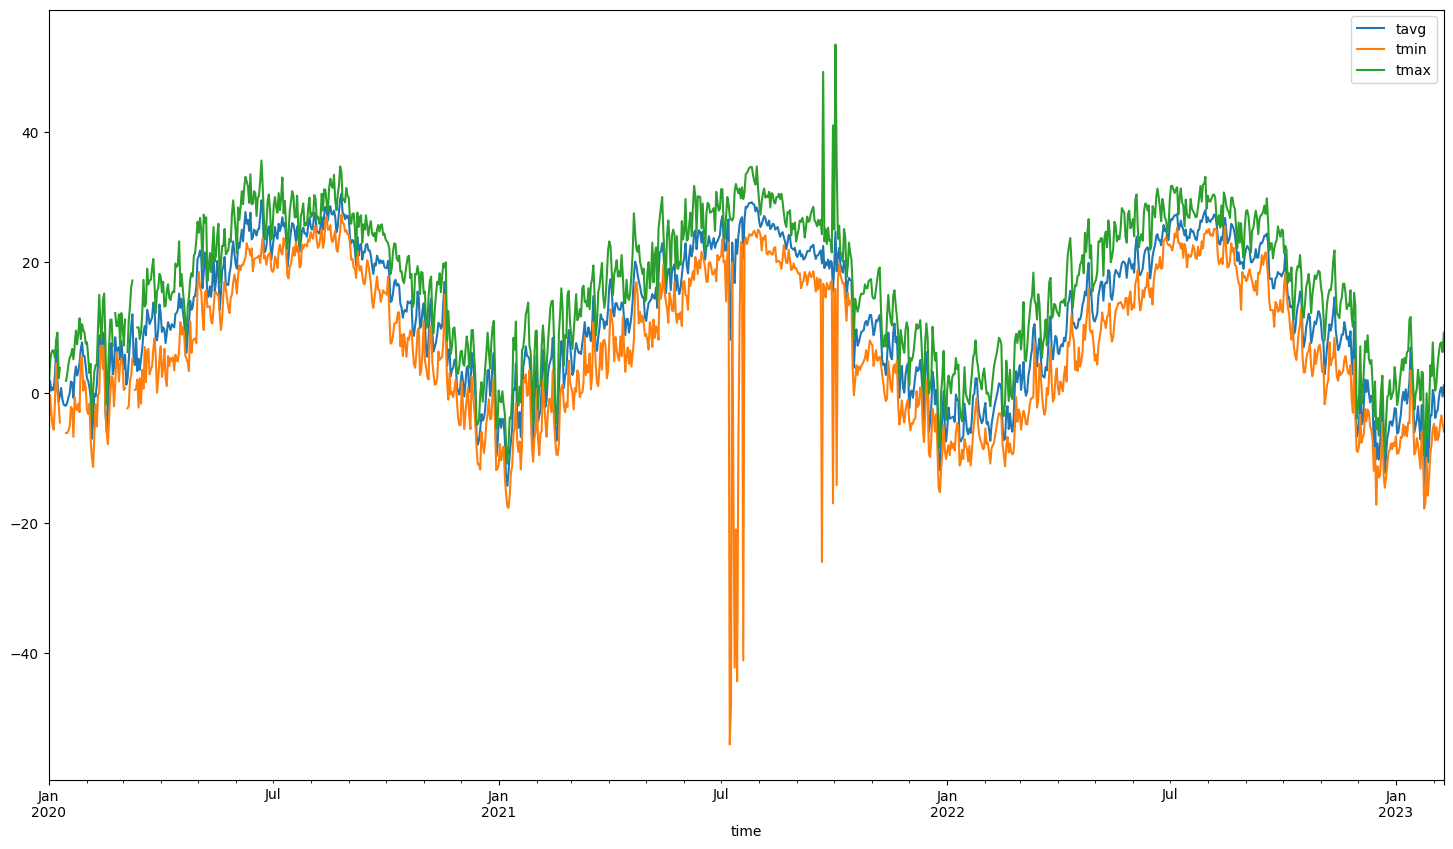

In [15]:
# Plot line chart including average, minimum and maximum temperature
df.plot(y=['tavg', 'tmin', 'tmax'],figsize=(18,10))
plt.show()

In [16]:
df

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,city
time,,,,,,,,,,,
2020-01-01,-0.6,-6.1,1.0,NaN,NaN,NaN,5.2,NaN,NaN,NaN,Seoul
2020-01-02,1.8,-0.4,4.7,0.0,NaN,0.0,0.0,NaN,1029.5,NaN,Seoul
2020-01-03,0.3,-3.0,6.0,0.0,NaN,341.0,3.2,NaN,NaN,NaN,Seoul
2020-01-04,0.8,-5.1,6.5,NaN,NaN,352.0,0.9,NaN,1025.8,NaN,Seoul
2020-01-05,0.4,-5.7,6.4,NaN,NaN,359.0,0.5,NaN,1030.2,NaN,Seoul
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-05,-0.8,-6.6,6.2,0.0,NaN,207.0,10.0,NaN,1025.5,NaN,Seoul
2023-02-06,0.4,-4.8,7.5,0.0,NaN,64.0,8.0,NaN,1023.2,NaN,Seoul
2023-02-07,0.8,-3.5,7.7,0.0,NaN,326.0,9.6,NaN,1021.9,NaN,Seoul


In [17]:
### ZOOM 

import plotly.graph_objects as go
fig = go.Figure()

#Actual 
fig.add_trace(go.Scatter(x = df.index, 
                         y = df['tavg'],
                         mode = "lines",
                         name = "Aveg",
                         line_color='#0000FF',
                         ))
##############################################################
#Predicted 
fig.add_trace(go.Scatter(x = df.index, 
                         y = df['tmax'],
                         mode = "lines", 
                         name = "Max",
                         line_color='#ff8c00',
                         ))

##############################################################
# adjust layout
fig.update_layout(title = "Titolo",
                  xaxis_title = "Date",
                  yaxis_title = "Sales",
                  width = 1700,
                  height = 700,
                  )
####################################################################
# zoomming
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=10, label="10y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

## Featurizing

In [ ]:
# if we have time as a string column -->
# df['Mese'] = pd.to_datetime(df['Data']).dt.month 
# df['Anno'] = pd.to_datetime(df['Data']).dt.year


In [18]:
import pandas as pd

url = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/monthly_csv.csv"
df1 = pd.read_csv( url,
                 index_col="Date",
                 parse_dates=['Date'],
                 ) 
df1

,Source,Mean
Date,,
2016-12-06,GCAG,0.7895
2016-12-06,GISTEMP,0.8100
2016-11-06,GCAG,0.7504
2016-11-06,GISTEMP,0.9300
2016-10-06,GCAG,0.7292
...,...,...
1880-03-06,GISTEMP,-0.1800
1880-02-06,GCAG,-0.1229
1880-02-06,GISTEMP,-0.2100


In [19]:
df1['year'] = pd.DatetimeIndex(df1.index).year
df1['month'] = pd.DatetimeIndex(df1.index).month
df1['day'] = pd.DatetimeIndex(df1.index).day

df1

,Source,Mean,year,month,day
Date,,,,,
2016-12-06,GCAG,0.7895,2016,12,6
2016-12-06,GISTEMP,0.8100,2016,12,6
2016-11-06,GCAG,0.7504,2016,11,6
2016-11-06,GISTEMP,0.9300,2016,11,6
2016-10-06,GCAG,0.7292,2016,10,6
...,...,...,...,...,...
1880-03-06,GISTEMP,-0.1800,1880,3,6
1880-02-06,GCAG,-0.1229,1880,2,6
1880-02-06,GISTEMP,-0.2100,1880,2,6


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3288 entries, 2016-12-06 to 1880-01-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  3288 non-null   object 
 1   Mean    3288 non-null   float64
 2   year    3288 non-null   int64  
 3   month   3288 non-null   int64  
 4   day     3288 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 154.1+ KB


In [21]:
import altair as alt 

alt.Chart(df1).mark_rect().encode( 
    x= 'year:O' , 
    y= 'month:O' , 
    color=alt.Color( 'Mean:Q' , scale=alt.Scale( range =['blue','green', 'yellow','orange','red'])) 
).properties(width= 1600,height=550)

alt.Chart(...)

In [22]:
alt.Chart(df1).mark_boxplot().encode(
    x='month',
    y='Mean'
).properties(width= 1000,height=550)

alt.Chart(...)

In [23]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',]

charts =alt.hconcat(spacing=0)
for i in range(1,13):
    if i == 1:
        axis = alt.Axis(grid=False)
    else:
        axis = None
    chart = alt.Chart(df1).mark_line().encode(
        x=alt.X('year:O', title=months[i-1]),
        y=alt.Y('Mean', axis=axis)
    ).transform_filter(
        alt.FieldEqualPredicate(field='month', equal=i)
    ).properties(
        width=300,
        height=550
    )
    charts |= chart

charts

alt.HConcatChart(...)